# 01 Vectors

<img src="figs/01_rgb_intro.png" alt="default"/>

<img src="figs/01_sumvectors.jpg" alt="default"/>

## Outline for ECE 3

#### Unit 1: Vectors, Book ILA Ch. 1-5
- **_01 Vectors_**
- 02 Linear Functions
- 03 Norms and Distances
- 04 Clustering
- 05 Linear Independence

#### Unit 2: Matrices, Book ILA Ch. 6-11 + Book IMC Ch. 2
#### Unit 3: Least Squares, Book ILA Ch. 12-14 + Book IMC Ch. 8
#### Unit 4: Eigen-decomposition, Book IMC Ch. 10, 12, 19

# Outline: 01 Vectors

- [First definitions and notations](#sec-def)

- [Examples](#sec-ex)

- [Addition, subtraction and scalar multiplication](#sec-op)

- [Inner product](#sec-ip)

- [Complexity](#sec-cpx)

<a id='sec-def'></a>

# Outline: 01 Vectors

- **[First definitions and notations](#sec-def)**

- [Examples](#sec-ex)

- [Addition, subtraction and scalar multiplication](#sec-op)

- [Inner product](#sec-ip)

- [Complexity](#sec-cpx)

# Vector: Definition


$\color{#EF5645}{\text{Definition}}$ A _vector_ is an ordered list of numbers, written as:

$$\begin{pmatrix}
    -1.1 \\
    0.0 \\
    3.6 \\
    -7.2
\end{pmatrix} \text{ or } \begin{bmatrix}
    -1.1 \\
    0.0 \\
    3.6 \\
    -7.2
\end{bmatrix} \text{ or } (-1.1, 0.0, 3.6, -7.2).$$ 

- The numbers in the list are called: _components, elements, entries, or coefficients_ of the vector.
- The number $n$ of elements in the list is called: _size, dimension, or length_ of the vector.
- If a vector has $n$ elements, it is called a $n$-vector.

$\color{#047C91}{\text{Exercise}}$: What are the components of the vector above? What is its dimension?

$\color{#EF5645}{\text{Definition}}$: In contrast to vectors, numbers are just called _scalars_. For example, 3.4 is a scalar.

# Vector: Notations

$\color{#EF5645}{\text{Notation}}$: 
- We use symbols to denote vectors, e.g., $a, X, p, β, E^\text{aut}, \mathbf{g}, \overrightarrow{a}$.
- The ith element of $n$-vector $a$ is denoted $a_i$.
- In $a_i$, the $i$ is the index.


$\color{#EF5645}{\text{Remarks}}$: What is really "$a_i$"?
- in Math: for an n-vector, indexes run from $i = 1$ to $i = n$,
- 😱 in Python: for an n-vector, indexes run from $i = 0$ to $i = n - 1$,
- 😱 Sometimes, $a_i$ refers to the ith vector in a list of vectors.

$\color{#EF5645}{\text{Definition}}$: Two vectors a and b of the same size $n$ are equal if:

$$a_i = b_i \text{ for all $i$ in $\{1, ..., n\}$}.$$

# Vector: Python

$\color{#003660}{\text{In Python}}$, vectors can be represented as:
- a list of numbers, using `[]`,
- a tuple of numbers, using `()`,
- an array of numbers with the package [NumPy](https://numpy.org/).


In [4]:
a = [-1.1, 0.0, 333.6, -7.2]; print(a)
b = (-1.1, 0.0, 3.6, -7.2); print(b)

[-1.1, 0.0, 333.6, -7.2]
(-1.1, 0.0, 3.6, -7.2)


In [7]:
import numpy as np
c = np.array([-1.1, 0.0, 3.6, -7.2]); c

array([-1.1,  0. ,  3.6, -7.2])

The size/length/dimension of a vector is computed with `len`.

In [8]:
len(a), len(b), len(c)

(4, 4, 4)

# Vector components: Python

$\color{#003660}{\text{In Python}}$, we can "access" the components of a vector with the following syntax.

In [10]:
a[0], b[0], c[0]

(-1.1, -1.1, -1.1)

😱- Be careful that the first element is indexed 0, and the last is indexed n - 1.

In [11]:
a[4]

IndexError: list index out of range

# Vector components: Python

$\color{#003660}{\text{In Python}}$, the components of a vector can be "assigned" (except for the tuple 😱 ). 

In [12]:
a[2] = 4.0; c[2] = 4.0
print(a); c

[-1.1, 0.0, 4.0, -7.2]


array([-1.1,  0. ,  4. , -7.2])

In [7]:
b[2] = 4.0
b

TypeError: 'tuple' object does not support item assignment

# 😱 Special Warning with NumPy Arrays

If we:
- assign a vector $a$ to another new vector $y$, 
- change the components of $a$,

Then the components of $y$ will be changed. 

The assignment of _arrays_ does not copy the original array to a new one, it creates a _reference_ to the same values.

In [16]:
y = a; print(a, y)
y[2] = 666; print(a, y)

[-1.1, 0.0, 4.0, 2023] [-1.1, 0.0, 4.0, 2023]
[-1.1, 0.0, 666, 2023] [-1.1, 0.0, 666, 2023]


To avoid this problem, use the `.copy` syntax:

In [17]:
y = a.copy(); print(a, y)
a[3] = 202222; print(a, y)

[-1.1, 0.0, 666, 2023] [-1.1, 0.0, 666, 2023]
[-1.1, 0.0, 666, 202222] [-1.1, 0.0, 666, 2023]


# Visualization of vectors

$\color{#003660}{\text{In Python}}$, we can use the package `matplotlib` to plot vectors.

The function `scatter` only plots a point that represents the end tip of the vector.

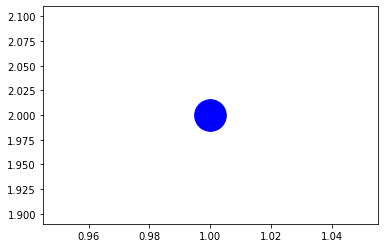

In [20]:
import matplotlib.pyplot as plt

vector_2d = [1, 2]
plt.scatter(vector_2d[0], vector_2d[1], color='blue', s=1000);

The fonction `quiver` can actually plot a vector.

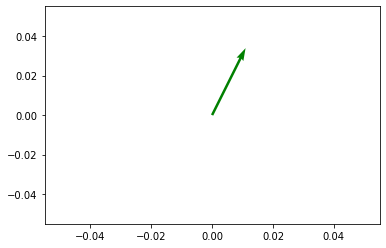

In [25]:
origin = [0, 0]

plt.quiver(origin[0], origin[1], vector_2d[0], vector_2d[1], color='green', scale=10); 

# Block or Stacked Vectors

$\color{#EF5645}{\text{Definition}}$: Suppose $a, b, c$ are vectors with sizes $m, n, p$. We can create a new vector $d$ as:

$$ d = \begin{bmatrix}
a \\
b \\
c
\end{bmatrix}.$$

The vector $d$ is called a _block vector or a stacked vector with entries $a, b, c$_, or simply the concatenation of $a, b, c$. $d$ has size $m+n+p$ with the following components:

$$d = (a_1, ..., a_m, b_1, ..., b_n, c_1, ..., c_p).$$


# Block or Stacked Vectors

$\color{#003660}{\text{In Python}}$, we can compute a block vector using `concatenate`.

In [36]:
a = np.array([1, -1]); b = np.array([2, -2, -2.2]); c = np.array([3, 3.3])
d = np.concatenate([a, b, c]); d

array([ 1. , -1. ,  2. , -2. , -2.2,  3. ,  3.3])

# Zero, Ones and One-Hot Vectors

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 0 is denoted $0_n$ or just $0$ and is called a zero vector. The n-vector with all entries 1 is denoted $1_n$ or just 1 and is called a ones-vector.

$\color{#EF5645}{\text{Definition}}$: A one-hot vector is a vector which has one entry 1 and all others 0. If $i$ is the index of the non-zero entry, we denote it $e_i$.

$\color{#047C91}{\text{Exercise}}$: What are all the one-hot vectors of length 3?

# Zero, Ones and One-Hot Vectors


$\color{#003660}{\text{In Python}}$:

In [30]:
zeros_vec = np.zeros(3); display(zeros_vec)
ones_vec = np.ones(4); display(ones_vec)

array([0., 0., 0.])

array([1., 1., 1., 1.])

In [40]:
i = 1; n = 3
ei = np.zeros(n); ei[i] = 1
ei

array([0., 1., 0.])

# Sparsity

$\color{#EF5645}{\text{Definition}}$: A vector is sparse if "many" of its entries are 0.
- Can be stored and manipulated efficiently on a computer.

$\color{#047C91}{\text{Exercise}}$: Give examples of sparse and non-sparse vectors.

<center><img src="figs/01_sparsity.jpeg" alt="default"/></center>
<center>The A100 packs sparse matrices to accelerate AI inference tasks</center>

<a id='sec-ex'></a>

# Outline: 01 Vectors

- [First definitions and notations](#sec-def)

- **[Examples](#sec-ex)**

- [Addition, subtraction and scalar multiplication](#sec-op)

- [Inner product](#sec-ip)

- [Complexity](#sec-cpx)

# Example: Location or displacement in 2D or 3D

The 2-vector $a=(a_1, a_2)$ can represent a location or a displacement in 2-D.

<center><img src="figs/01_sumvectors.jpg" width=500px alt="default"/></center>

# Example: Color in RGB

The 3-vector $a$ can represent a color in RGB: $a = (R, G, B)$


<center><img src="figs/01_matrix_color.jpeg" alt="default"/></center>

<center>The matrix coloring is an operation on vectors</center>

<img src="figs/01_rgb_intro.png" width=400px alt="default"/>

<img src="figs/01_rgb.jpg" alt="default"/>

# Example: Word count vectors

The $n$-vector $a$ can represent the count of $n$ words in a given document.

In a short document: 

_Word count vectors are used in computer based document analysis. Each entry of the word count vector is the number of times the associated dictionary word appears in the document._

$\color{#047C91}{\text{Exercise}}$: Give the word count vector associated to the text in italic above using the following dictionnary:

$$D = \{\text{word, in, number, horse, the, document} \}.$$

# Other examples in ECE and beyond

- Education: Grades of n different exams
- Audio: $a_i$ is the acoustic pressure at sample time $i$ (sample times are spaced 1/44100 seconds apart)
- Deep Learning: Layers of a neural network

<center><img src="figs/01_nn.png" alt="default" width=400px/></center>
<center>Each layer is represented as a vector in the computer.</center>

# Outline: 01 Vectors

- [First definitions and notations](#sec-def)

- [Examples](#sec-ex)

- **[Addition, subtraction and scalar multiplication](#sec-op)**

- [Inner product](#sec-ip)

- [Complexity](#sec-cpx)

# Vector Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two (or more) n-vectors a and b can be added, with sum denoted a + b. 
- The sum is computed by adding corresponding entries.
- Similary, a and b can be subtracted, with subtraction denoted a - b, and subtracting entries.

$\color{#047C91}{\text{Exercise}}$: Compute:

$$\begin{bmatrix}
0 \\
7 \\
3
\end{bmatrix} + \begin{bmatrix}
    1 \\
    2 \\
    0 \end{bmatrix}$$

# Vector Addition and Subtraction

$\color{#003660}{\text{In Python}}$:

In [88]:
a = np.array([0, 7, 3]) + np.array([1, 2, 0]); display(a)
a = np.array([1, 9]) - np.array([1, 1]); display(a)

array([1, 9, 3])

array([0, 8])

# Properties of Vector Addition

$\color{#6D7D33}{\text{Properties}}$:
- commutative: $a + b = b + a$
- associative: $(a + b) + c = a + (b + c) = a + b + c$
- $a + 0 = a$
- $a - a = 0$

# Adding displacement vectors

If vectors a and b are displacements, a + b is the sum displacement

<center><img src="figs/01_sumvectors.jpg" alt="Drawing" width=500px /></center>

# Displacement from one point to another

Displacement from point q to point p is p − q


<center><img src="figs/01_subpoints.jpg" width=500px alt="default"/></center>

# Scalar-vector multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and a n-vector a can be multiplied: $βa = ( βa_1, . . . , β a_n)$.


$\color{#047C91}{\text{Exercise}}$: Compute:

$$(-2) \begin{bmatrix}
    1 \\
    9 \\
    6 \end{bmatrix}.$$




$\color{#003660}{\text{In Python}}$:

In [67]:
x = np.array([0, 2, -1]) 
2.2 * x

array([ 0. ,  4.4, -2.2])

# Properties of scalar-vector multiplication

$\color{#6D7D33}{\text{Properties}}$:
- associative: $( βγ)a = β(γa)$
- left distributive: $( β + γ)a = βa + γa$
- right distributive: $β(a + b) = βa + βb$

$\color{#003660}{\text{In Python}}$:

In [68]:
a = np.array([1, 2]); b = np.array([3, 4]); beta = 0.5

lhs = beta * (a + b)
rhs = beta * a + beta * b
lhs, rhs

(array([2., 3.]), array([2., 3.]))

# Linear combinations

$\color{#EF5645}{\text{Definition}}$: For n-vectors $a_1, . . . , a_m$ and scalars $β_1, . . . , β_m$:

$$β_1a_1 + · · · + β_ma_m$$

is a linear combination of the vectors.
- $β_1, . . . , β_m$ are the coefficients.


$\color{#047C91}{\text{Exercise}}$: Write a $n$-vector $b = (b_1, ..., b_{n})$ as a linear combination of the one-hot n-vectors $e_1, ..., e_{n}$.

# Linear combinations


$\color{#003660}{\text{In Python}}$:

In [69]:
a, b = np.array([1, 2]), np.array([3, 4])
alpha, beta = -.5, 1.5
alpha * a + beta * b

array([4., 5.])

# Displacements and Linear Combination

Two vectors $a_1$ and $a_2$, and linear combination $b = 0.75a_1 + 1.5a_2$


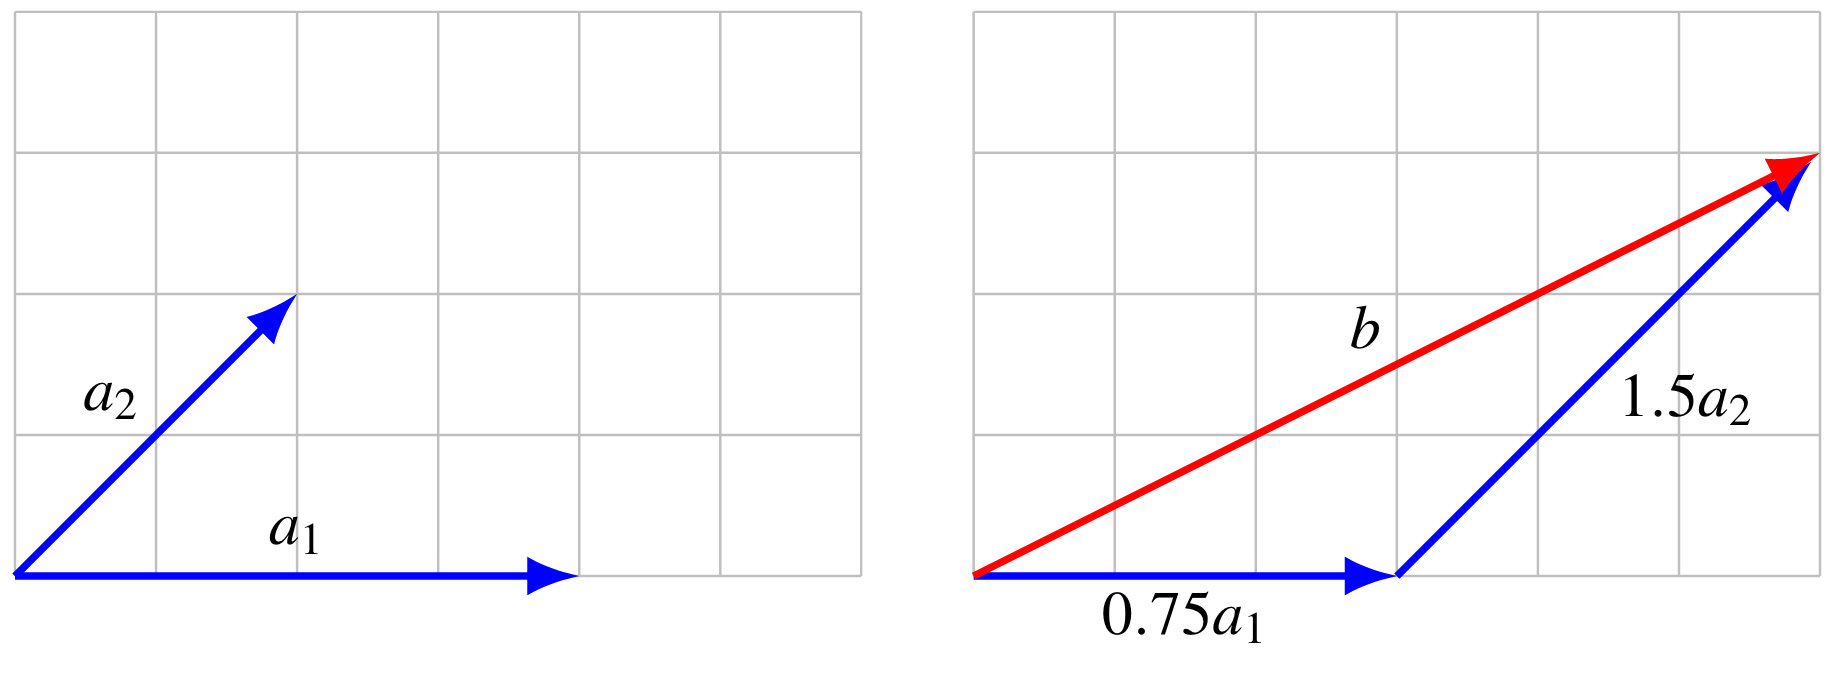

<a id='sec-ip'></a>

# Outline: 01 Vectors

- [First definitions and notations](#sec-def)

- [Examples](#sec-ex)

- [Addition, subtraction and scalar multiplication](#sec-op)

- **[Inner product](#sec-ip)**

- [Complexity](#sec-cpx)

# Inner Product

$\color{#EF5645}{\text{Definition}}$: The inner product (or dot product) of n-vectors a and b is
$$a^T b = a_1b_1 + a_2b_2 + · · · + a_nb_n.$$
- Other notations: $〈a, b〉, 〈a|b〉, (a, b), a · b$.

$\color{#047C91}{\text{Exercise}}$: Compute the inner product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

$\color{#003660}{\text{In Python}}$:

In [4]:
import numpy as np

x = np.array([-1, 2, 2])
y = np.array([1, 0, -3])
np.inner(x, y)

-7

# Properties of inner product

$\color{#6D7D33}{\text{Properties}}$:
- $a^T b = b^T a$
- $(γa)^T b = γ(a^T b)$
- $(a + b)^T c = a^T c + b^T c$


$\color{#047C91}{\text{Exercise (at home)}}$:
- Show that: $(a + b)^T (c + d) = a^T c + a^T d + b^T c + b^T d$
- Given $a = (a_1, ..., a_{n})$: compute $e_i^Ta$, $1^Ta$, $a^T a$ using the entries of $a$.

# Examples in ECE and beyond


- Education: $p$ grades, $q$ weights; $p^T q$ is the total grade

- Deep Learning:
<center><img src="figs/01_nn.png" alt="default" width=350px/></center>

<center>Inner product in neural networks.</center>

# Outline: 01 Vectors

- [First definitions and notations](#sec-def)

- [Examples](#sec-ex)

- [Addition, subtraction and scalar multiplication](#sec-op)

- [Inner product](#sec-ip)

- **[Complexity](#sec-cpx)**

# Complexity = Flop Counts

Computers store (real) numbers in floating-point format.

In [1]:
a = 1.4
type(a)

float

$\color{#EF5645}{\text{Definition}}$: Basic arithmetic operations (addition, multiplication, . . . ) are called floating point operations or flops.

# Complexity = Flop Counts


$\color{#EF5645}{\text{Definition}}$: The complexity of an algorithm or operation is the total number of flops needed, as function of the input dimension(s).
- Complexity allows to estimate the execution time: time to execute $\simeq$ (flops needed)/(computer speed)

- Current computers are around 1Gflop/sec ($10^9$ flop/sec)
- But the supercomputer can have many TeraFlop/sec ($10^{12}$ flop/sec)

<center><img src="figs/01_supercomputers.png" width=400px alt="default"/></center>
<center>Source: https://www.weforum.org/agenda/2021/01/supercomputer-world-technology-computer-japan-fugaku/</center>

# Complexity of addition, inner product

- $x + y$ needs $n$ additions, so: $n$ flops 
- $x^T y$ needs $n$ multiplications and $n − 1$ additions so: $2n − 1$ flops --> approximated to $2n$

🤩 Much less flops are needed when $x$ or $y$ is sparse.

# Outline: 01 Vectors

- [First definitions and notations](#sec-def)

- [Examples](#sec-ex)

- [Addition, subtraction and scalar multiplication](#sec-op)

- [Inner product](#sec-ip)

- [Complexity](#sec-cpx)

# Resources

- Ch. 1 of Book ILA

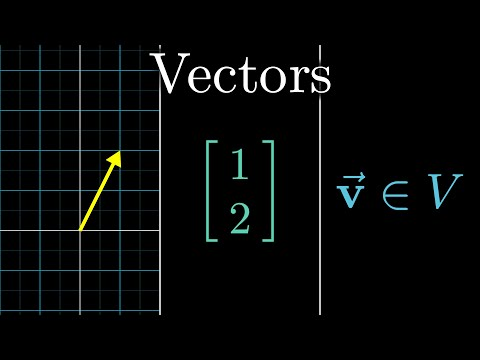

In [3]:
from IPython.display import Audio,Image, YouTubeVideo
id='fNk_zzaMoSs'
YouTubeVideo(id=id,width=600,height=300)